In [1]:
from tfConstrainedGauss import solve_me, random_cov_mat, \
    random_non_zero_idx_pairs, InputsME, convert_mat_to_mat_non_zero, convert_mat_non_zero_to_mat
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pickle

# Test 8x8 matrix problem with random precision matrix structure and random covariance constraints using MaxEnt approach

### Generate & Save

In [ ]:
n = 8

# Non-zero idxs
non_zero_idx_pairs = random_non_zero_idx_pairs(n)

# Random cov mat
cov_mat = random_cov_mat(n)

prec_mat_structure = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=np.full(len(non_zero_idx_pairs),1.0)
)

### Alternate: load existing

No non-zero off-diagonal elements: 14 max possible: 28


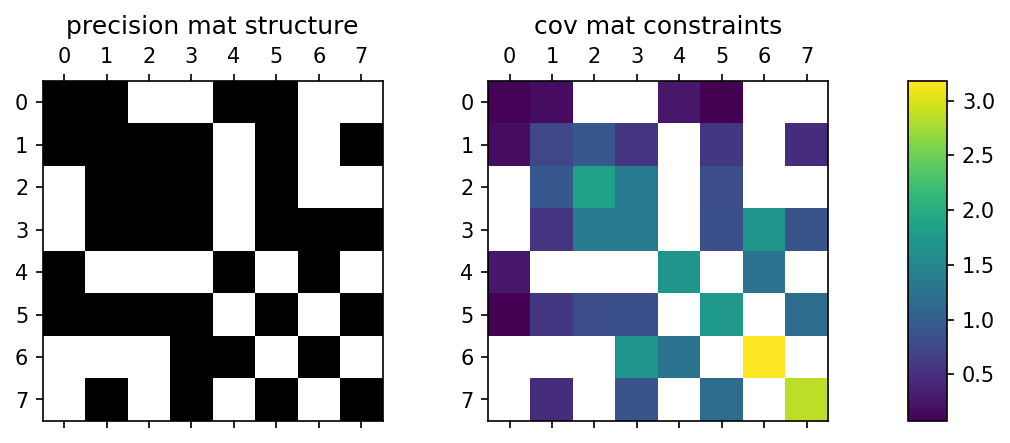

In [32]:
clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 1, 0.1]}
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(8,3)

ax1.matshow(prec_mat_structure,cmap='Greys')
ax1.set_title("precision mat structure")

z2plot = ax2.matshow(cov_mat)
ax2.imshow(prec_mat_structure,cmap=clear_cmap)
ax2.set_title("cov mat constraints")

plt.colorbar(z2plot,cax=ax3)

## Learn

In [33]:
target_cov_mat_non_zero = convert_mat_to_mat_non_zero(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat=cov_mat
)

inputs = InputsME(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    target_cov_mat_non_zero=target_cov_mat_non_zero,
    epochs=300,
    learning_rate=0.01,
    use_weighted_loss=True
)
results = solve_me(inputs)

Prec mat initial guess for non-zero elements [-4.96111944e+01 -1.00214600e+01  1.24629839e-01 -4.10361126e+00
  2.87106007e-01  8.14033198e-01 -4.76383134e-01  3.89117174e-01
  8.49546814e-01 -2.71262181e-01  2.62337302e+01 -3.92372824e-01
  4.25406540e+00 -2.54957482e-02 -1.09701692e-01  1.42116973e+00
  6.16868770e-01 -5.43902916e-01  1.87880336e+00  6.04884575e+00
 -1.90805121e+00  3.58817804e+00]
Initial cov mat corresponding non-zero elements [-2.50379089e-03  2.36342616e-02  5.70636680e+00  1.20623734e-01
  7.37456987e-01  1.57827908e+00  4.39967030e-02  3.57820194e+00
 -2.02004866e-01  1.28730989e+00  1.52837166e-02 -7.90765470e-01
  1.16526895e-01  1.44204518e+00 -2.63800877e-01  1.07711017e-02
 -1.16849398e-01 -5.37887607e-01  3.87693926e-01  9.90255983e-02
 -1.53918049e-01 -5.81854749e-03]
Using weighted loss functing with weights: [9.3985832e+01 1.8401345e+00 2.8923735e-01 5.5029470e-01 3.4982631e-01
 3.2329810e-01 9.8962694e-02 1.2165632e-01 1.4220418e+00 7.2720587e-01
 3.2

In [34]:
results.report()

----- Results -----
Prec mat initial guess for non-zero elements:
[-4.96111944e+01 -1.00214600e+01  1.24629839e-01 -4.10361126e+00
  2.87106007e-01  8.14033198e-01 -4.76383134e-01  3.89117174e-01
  8.49546814e-01 -2.71262181e-01  2.62337302e+01 -3.92372824e-01
  4.25406540e+00 -2.54957482e-02 -1.09701692e-01  1.42116973e+00
  6.16868770e-01 -5.43902916e-01  1.87880336e+00  6.04884575e+00
 -1.90805121e+00  3.58817804e+00]
-> Learned prec mat non-zero elements:
[-52.870262   -13.108513     0.25603426  -4.10038      0.5770697
   1.3157725   -0.93821317   1.2993957    0.51477385   0.23313352
  23.259771    -1.2464335    2.1864705    0.18757817  -0.7176789
   1.6434878   -1.6528003   -0.5602727    2.3607311    3.2938116
  -3.5195632    0.94634205]
Initial cov mat non-zero elements corresponding to initial prec mat guess:
[-2.50379089e-03  2.36342616e-02  5.70636680e+00  1.20623734e-01
  7.37456987e-01  1.57827908e+00  4.39967030e-02  3.57820194e+00
 -2.02004866e-01  1.28730989e+00  1.528371

## Plot learned covariance matrix constraints

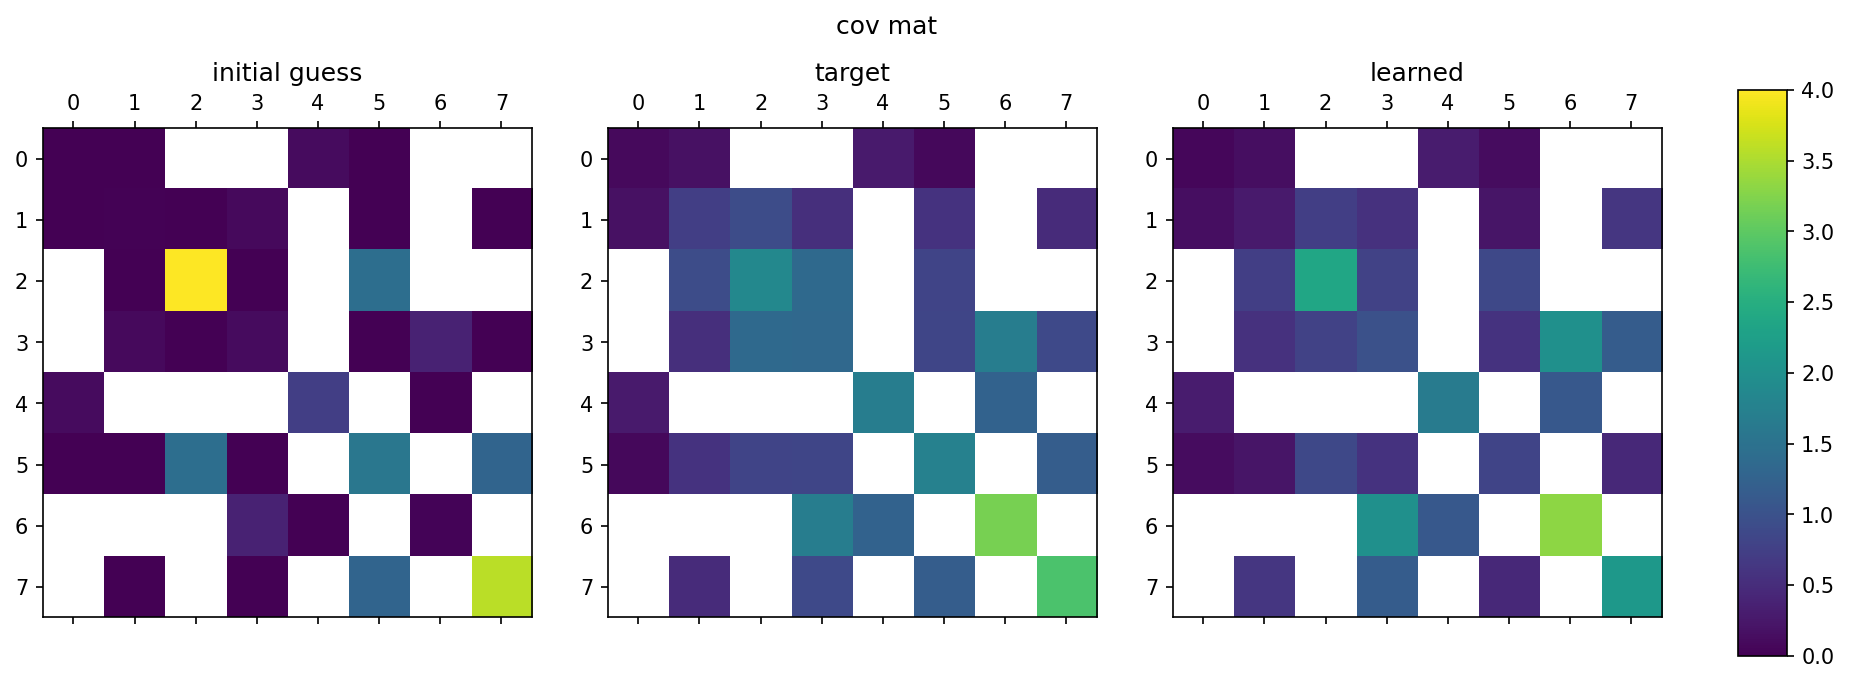

In [35]:
init_cov_mat_reconstructed = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=results.init_cov_mat_reconstructed_non_zero
)

low=0
high=4

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 1, 1, 0.1]}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(15,5)
fig.suptitle("cov mat")

ax1.matshow(init_cov_mat_reconstructed,vmin=low,vmax=high)
ax1.imshow(prec_mat_structure,cmap=clear_cmap)
ax1.set_title('initial guess')

ax2.matshow(cov_mat,vmin=low,vmax=high)
ax2.imshow(prec_mat_structure,cmap=clear_cmap)
ax2.set_title('target')

z3plot = ax3.matshow(results.learned_cov_mat,vmin=low,vmax=high)
ax3.imshow(prec_mat_structure,cmap=clear_cmap)
ax3.set_title('learned')

plt.colorbar(z3plot,cax=ax4)

## Plot precision matrix learned and it's inverse = full covariance matrix

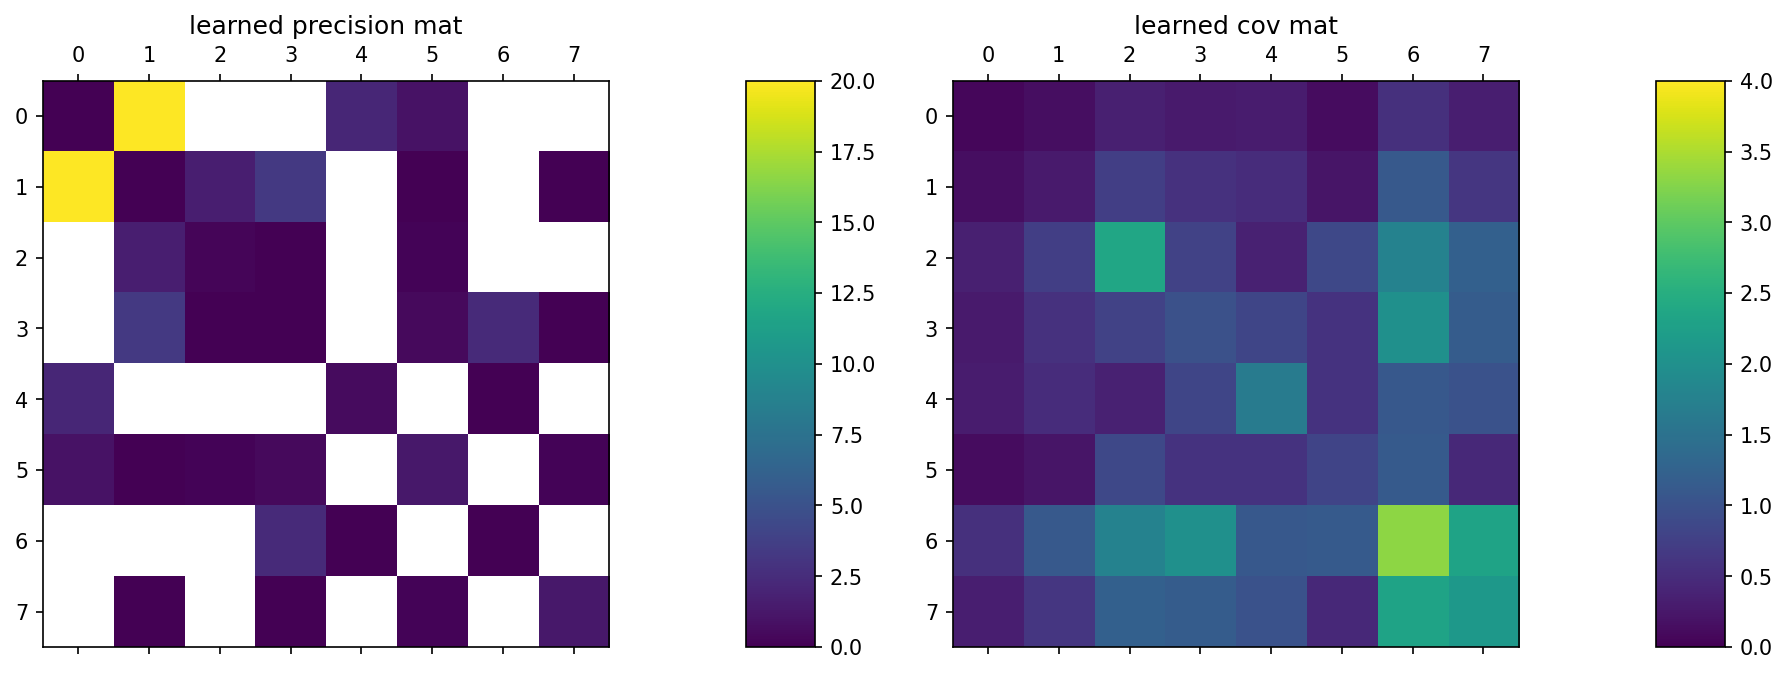

In [41]:
init_cov_mat_reconstructed = convert_mat_non_zero_to_mat(
    n=n,
    non_zero_idx_pairs=non_zero_idx_pairs,
    mat_non_zero=results.init_cov_mat_reconstructed_non_zero
)

clear_cmap = ListedColormap(['white', 'none'])

gridspec = {'width_ratios': [1, 0.1, 1, 0.1]}
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, gridspec_kw=gridspec, dpi=150)
fig.set_size_inches(15,5)

z1plot = ax1.matshow(results.learned_prec_mat,vmin=0,vmax=20)
ax1.imshow(prec_mat_structure,cmap=clear_cmap)
ax1.set_title('learned precision mat')

plt.colorbar(z1plot,cax=ax2)

z3plot = ax3.matshow(results.learned_cov_mat,vmin=0,vmax=4)
ax3.set_title('learned cov mat')

plt.colorbar(z3plot,cax=ax4)

# Compare to solving ID method

inputs = InputsID(
    n=n
)